In [1]:
%load_ext autoreload
%autoreload 2

import sympy 
import numpy as np 
import pandas as pd 

from utilities.circuit_database import CirqTranslater
from utilities.templates import *
from utilities.variational import Minimizer
import matplotlib.pyplot as plt 


In [2]:
translator = CirqTranslater(3)
circuit_db = u2_layer(translator)
circuit, circuit_db = translator.give_circuit(circuit_db)

In [3]:
minimizer = Minimizer(translator, mode="VQE", hamiltonian="XXZ",params=[.01,1])

computing ground state energy...


In [6]:
symbols = translator.get_symbols(circuit_db)
cost, resolver, training_history = minimizer.minimize([circuit], symbols)
minimizer.lower_bound_cost

-3.010000000000001

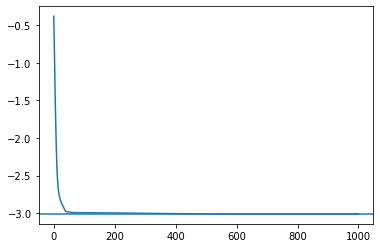

In [7]:
ax=plt.subplot(111)
ax.plot(training_history.history["cost"])
ax.axhline(minimizer.lower_bound_cost)

In [10]:
optimizer_circuit_db = translator.update_circuit_db_param_values(circuit_db,resolver)

In [ ]:
minimizer.give_energy()